In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
data = pd.read_csv('event_properties_1M.csv')
#columns_to_include = ['no_of_jets','lead_jet_mass', 'lead_jet_energy','lead_jet_pt','lead_jet_multiplicity',
#       'lead_jet_m/pt', 'avg_pt','avg_distance', 'jet_width_1', 'jet_width_2', 'sublead_jet_pt', 'target']
#data = data[columns_to_include]
data.dropna(inplace=True)
data = data.sample(frac=0.05, random_state=42)

In [3]:
data.columns

Index(['no_of_jets', 'lead_jet_pt', 'lead_jet_eta', 'lead_jet_phi',
       'lead_jet_mass', 'lead_jet_energy', 'lead_jet_multiplicity',
       'lead_jet_m/pt', 'avg_pt', 'var_pt', 'avg_distance', 'var_distance',
       'var_phi', 'jet_width_1', 'jet_width_2', 'sublead_jet_pt',
       'sublead_jet_eta', 'sublead_jet_phi', 'target'],
      dtype='object')

In [3]:
# Split the data into features (X) and target variable (y)
X = data.drop('target', axis=1).values  # Drop the target column and convert to numpy array
y = data['target'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [5]:
# Define the model
class Model(nn.Module):
    def __init__(self, input_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [6]:
class ComplexModel(nn.Module):
    def __init__(self, input_size):
        super(ComplexModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.dropout1 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(64, 128)
        self.dropout2 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.1)
        self.fc4 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

In [7]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_pred = lr_classifier.predict(X_test)

# SVM (Support Vector Machine)
svm_classifier = SVC(kernel='rbf')  # You can choose different kernels like 'rbf', 'poly', etc.
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)

# Evaluate models
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("Logistic Regression Accuracy:", lr_accuracy)
print("SVM Accuracy:", svm_accuracy)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))

Logistic Regression Accuracy: 0.7552010402080416
SVM Accuracy: 0.780756151230246

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      9974
           1       0.75      0.76      0.76     10022

    accuracy                           0.76     19996
   macro avg       0.76      0.76      0.76     19996
weighted avg       0.76      0.76      0.76     19996


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      9974
           1       0.78      0.78      0.78     10022

    accuracy                           0.78     19996
   macro avg       0.78      0.78      0.78     19996
weighted avg       0.78      0.78      0.78     19996



In [8]:
from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
# }

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300)

rf_model.fit(X_train,y_train)
# # Perform grid search using cross-validation
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Use the best model for prediction
# best_rf_model = grid_search.best_estimator_
train_preds = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print("Train Accuracy:", train_accuracy)

#Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
# Calculate accuracy
test_preds = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy:", test_accuracy)

print(classification_report(y_test, test_preds))

Train Accuracy: 0.935821455363841
Test Accuracy: 0.778505701140228
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      9974
           1       0.78      0.77      0.78     10022

    accuracy                           0.78     19996
   macro avg       0.78      0.78      0.78     19996
weighted avg       0.78      0.78      0.78     19996



In [9]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.7765553110622124
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      9974
           1       0.78      0.77      0.78     10022

    accuracy                           0.78     19996
   macro avg       0.78      0.78      0.78     19996
weighted avg       0.78      0.78      0.78     19996



In [10]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': data.drop('target', axis=1).columns, 'Importance': feature_importances})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
15,sublead_jet_pt,0.121675
13,jet_width_1,0.108724
9,var_pt,0.105898
8,avg_pt,0.093928
14,jet_width_2,0.090022
1,lead_jet_pt,0.075925
7,lead_jet_m/pt,0.067682
4,lead_jet_mass,0.039509
5,lead_jet_energy,0.035954
16,sublead_jet_eta,0.034651


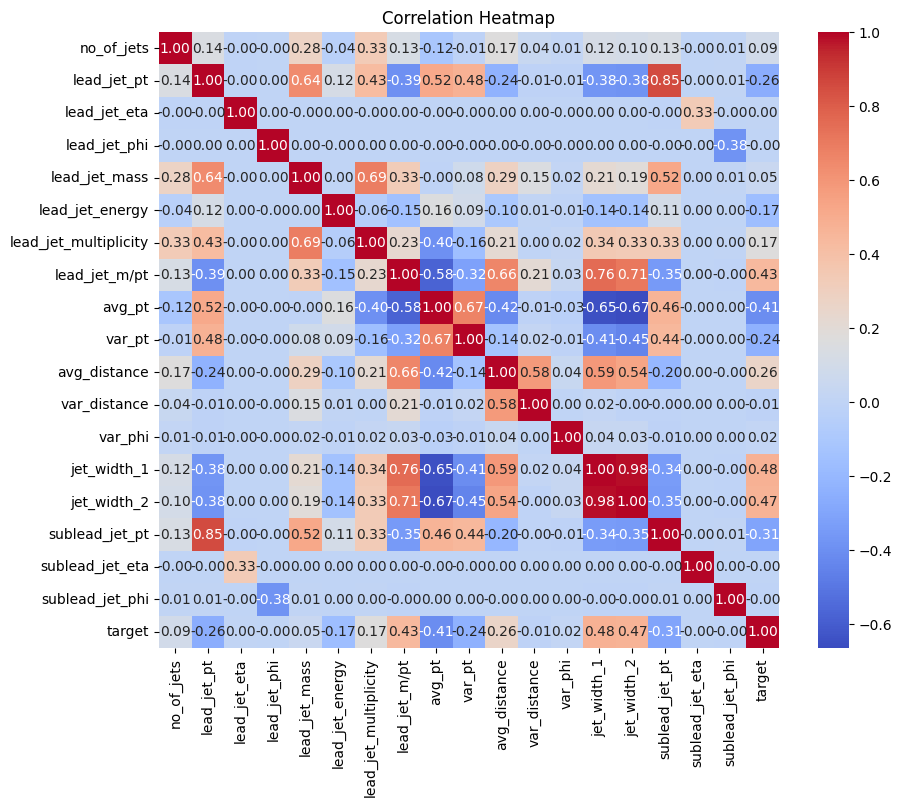

In [21]:
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Add title
plt.title("Correlation Heatmap")

# Show plot
plt.show()

In [13]:
# Initialize the model
input_size = X_train.shape[1]
model = ComplexModel(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)

# Train the model
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Train the model
num_epochs = 50
batch_size = 10000 # Adjust batch size as needed

for epoch in range(num_epochs):
    epoch_train_loss = 0.0
    epoch_train_acc = 0.0
    epoch_test_loss = 0.0
    epoch_test_acc = 0.0
    
    # Training phase
    model.train()  # Set the model to train mode
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)
        train_loss = criterion(outputs.squeeze(), labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Calculate train accuracy
        with torch.no_grad():
            train_pred = (outputs > 0.5).float()
            train_acc = accuracy_score(train_pred, labels)

        # Accumulate batch-wise metrics
        epoch_train_loss += train_loss.item()
        epoch_train_acc += train_acc

    # Average batch-wise metrics
    epoch_train_loss /= len(X_train_tensor) / batch_size
    epoch_train_acc /= len(X_train_tensor) / batch_size

    # Testing phase
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for i in range(0, len(X_test_tensor), batch_size):
            inputs = X_test_tensor[i:i+batch_size]
            labels = y_test_tensor[i:i+batch_size]

            # Forward pass
            outputs = model(inputs)
            test_loss = criterion(outputs.squeeze(), labels)

            # Calculate test accuracy
            test_pred = (outputs > 0.5).float()
            test_acc = accuracy_score(test_pred, labels)

            # Accumulate batch-wise metrics
            epoch_test_loss += test_loss.item()
            epoch_test_acc += test_acc

    # Average batch-wise metrics
    epoch_test_loss /= len(X_test_tensor) / batch_size
    epoch_test_acc /= len(X_test_tensor) / batch_size

    # Append metrics to lists
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    # Print progress
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_acc:.4f}, Test Loss: {epoch_test_loss:.4f}, Test Accuracy: {epoch_test_acc:.4f}')



Epoch [1/50], Train Loss: 0.5055, Train Accuracy: 0.7533, Test Loss: 0.4669, Test Accuracy: 0.7774
Epoch [2/50], Train Loss: 0.4720, Train Accuracy: 0.7767, Test Loss: 0.4635, Test Accuracy: 0.7796
Epoch [3/50], Train Loss: 0.4684, Train Accuracy: 0.7787, Test Loss: 0.4621, Test Accuracy: 0.7806
Epoch [4/50], Train Loss: 0.4668, Train Accuracy: 0.7796, Test Loss: 0.4613, Test Accuracy: 0.7814
Epoch [5/50], Train Loss: 0.4656, Train Accuracy: 0.7805, Test Loss: 0.4606, Test Accuracy: 0.7819
Epoch [6/50], Train Loss: 0.4648, Train Accuracy: 0.7808, Test Loss: 0.4602, Test Accuracy: 0.7823
Epoch [7/50], Train Loss: 0.4643, Train Accuracy: 0.7810, Test Loss: 0.4597, Test Accuracy: 0.7826
Epoch [8/50], Train Loss: 0.4635, Train Accuracy: 0.7816, Test Loss: 0.4595, Test Accuracy: 0.7829
Epoch [9/50], Train Loss: 0.4628, Train Accuracy: 0.7821, Test Loss: 0.4585, Test Accuracy: 0.7835
Epoch [10/50], Train Loss: 0.4621, Train Accuracy: 0.7824, Test Loss: 0.4579, Test Accuracy: 0.7838
Epoch [11

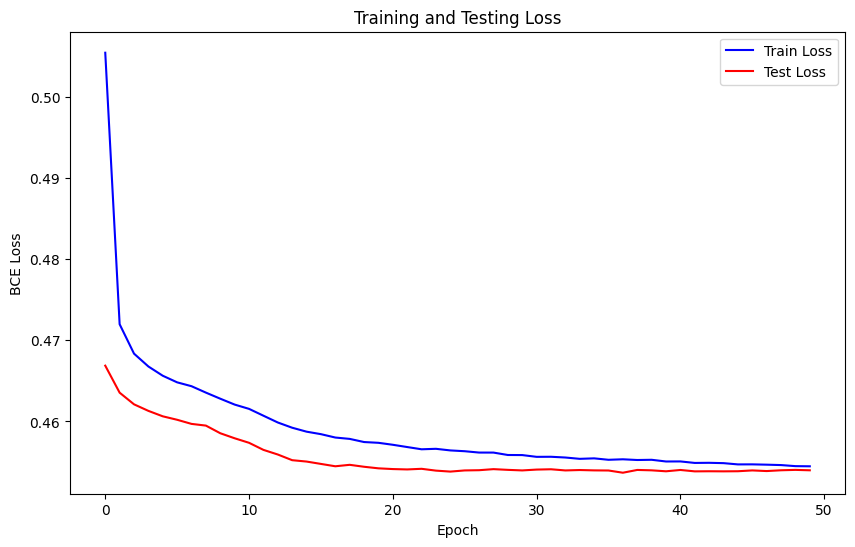

In [14]:
# Plot the curves
plt.figure(figsize=(10, 6))

# Plot train loss
plt.plot(train_losses, label='Train Loss', color='blue')

# Plot test loss
plt.plot(test_losses, label='Test Loss', color='red')


# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.title('Training and Testing Loss')

# Add legend
plt.legend()

# Show plot
plt.show()

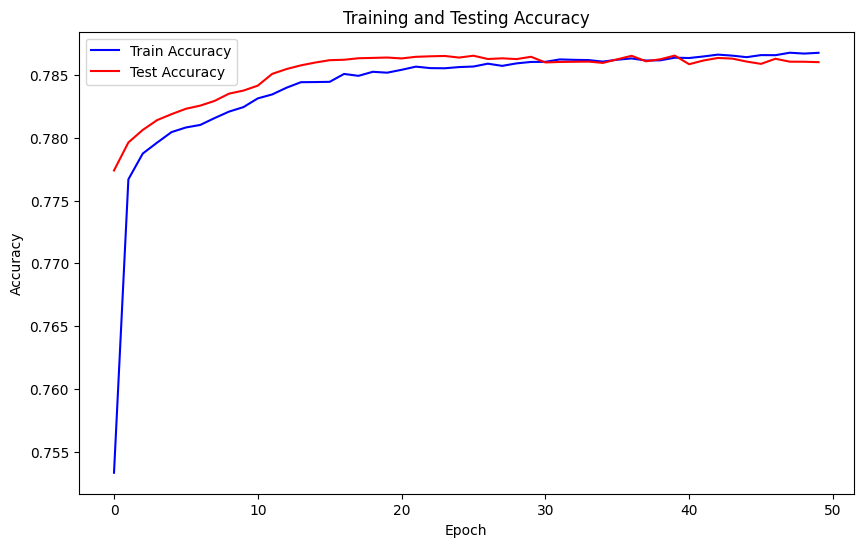

In [15]:
plt.figure(figsize=(10, 6))

# Plot train accuracy
plt.plot(train_accuracies, label='Train Accuracy', color='blue')
# Plot test accuracy
plt.plot(test_accuracies, label='Test Accuracy', color='red')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')

# Add legend
plt.legend()

# Show plot
plt.show()

Accuracy: 0.7858
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79    204234
         1.0       0.77      0.79      0.78    195669

    accuracy                           0.79    399903
   macro avg       0.79      0.79      0.79    399903
weighted avg       0.79      0.79      0.79    399903

ROC AUC Score: 0.7859831825173755


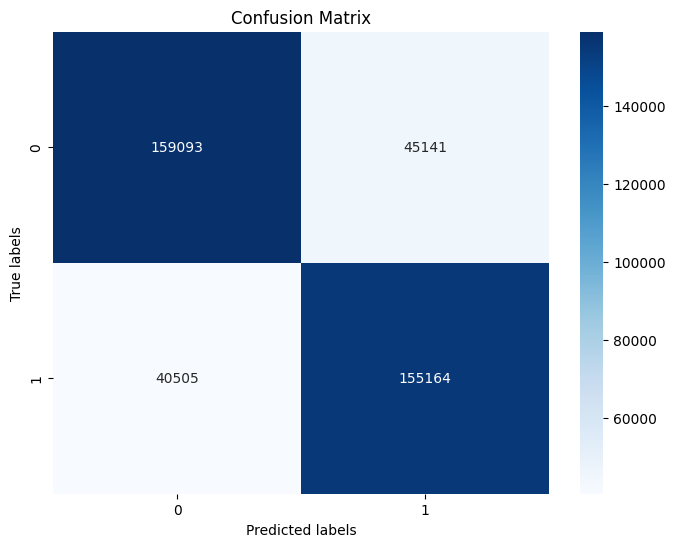

In [23]:
# Evaluate the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted = (outputs.squeeze() > 0.5).float()
    accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(predicted, y_test))
    roc_auc = roc_auc_score(predicted, y_test)
    print("ROC AUC Score:", roc_auc)    
    conf_matrix = confusion_matrix(predicted, y_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap= "Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

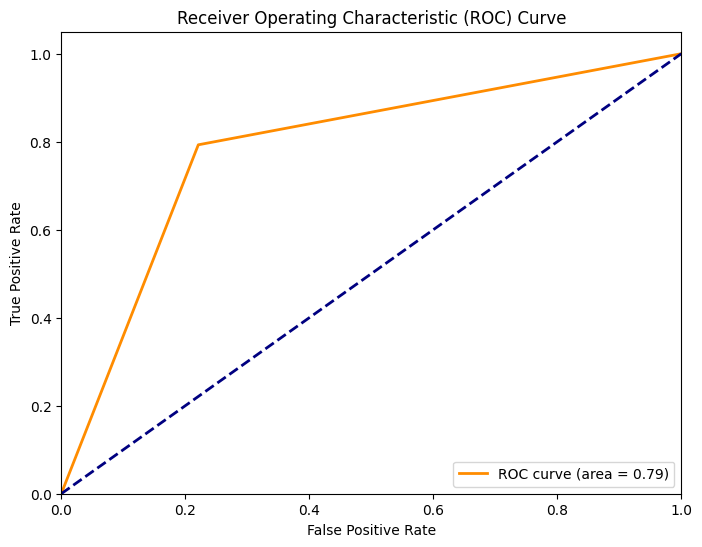

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_score contains the predicted scores
# y_score should be the probability estimates of the positive class

# Compute ROC curve
fpr, tpr, _ = roc_curve(predicted, y_test)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()